In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')

In [5]:
# 경고 무시
warnings.filterwarnings(action='ignore')

In [66]:
case = pd.read_csv('./covid-19/Case.csv')
time = pd.read_csv('./covid-19/Time.csv')
time_age = pd.read_csv('./covid-19/TimeAge.csv')
time_gender = pd.read_csv('./covid-19/TimeGender.csv')
time_province = pd.read_csv('./covid-19/TimeProvince.csv')

In [14]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [16]:
case.columns = ['사례번호', '시도', '군구', '집단감염여부', '집단감염장소', '확진자누적수', '위도', '경도']
case.head()

,사례번호,시도,군구,집단감염여부,집단감염장소,확진자누적수,위도,경도
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [17]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사례번호    174 non-null    int64 
 1   시도      174 non-null    object
 2   군구      174 non-null    object
 3   집단감염여부  174 non-null    bool  
 4   집단감염장소  174 non-null    object
 5   확진자누적수  174 non-null    int64 
 6   위도      174 non-null    object
 7   경도      174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [19]:
case['집단감염장소'].value_counts()

집단감염장소
etc                                17
overseas inflow                    17
contact with patient               16
Shincheonji Church                 15
Itaewon Clubs                       9
                                   ..
Second Mi-Ju Hospital               1
Hansarang Convalescent Hospital     1
Daesil Convalescent Hospital        1
Fatima Hospital                     1
Soso Seowon                         1
Name: count, Length: 81, dtype: int64

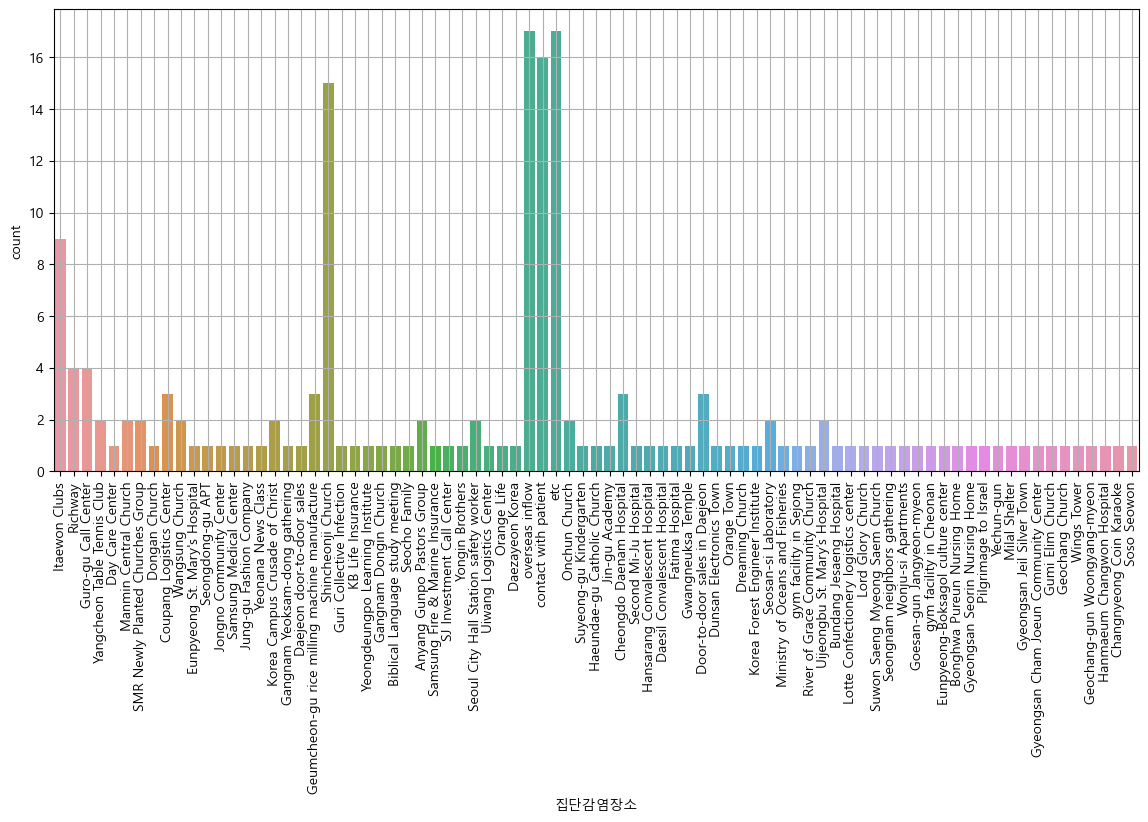

In [31]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.countplot(case, x='집단감염장소')
plt.grid()

In [32]:
# 장소별 확진자 수
NOCP = case.groupby('집단감염장소', as_index=False).agg(감염자수=('확진자누적수', 'sum'))
NOCP

,집단감염장소,감염자수
0,Anyang Gunpo Pastors Group,23
1,Biblical Language study meeting,3
2,Bonghwa Pureun Nursing Home,68
3,Bundang Jesaeng Hospital,22
4,Changnyeong Coin Karaoke,7
...,...,...
76,contact with patient,1403
77,etc,1192
78,gym facility in Cheonan,103
79,gym facility in Sejong,8


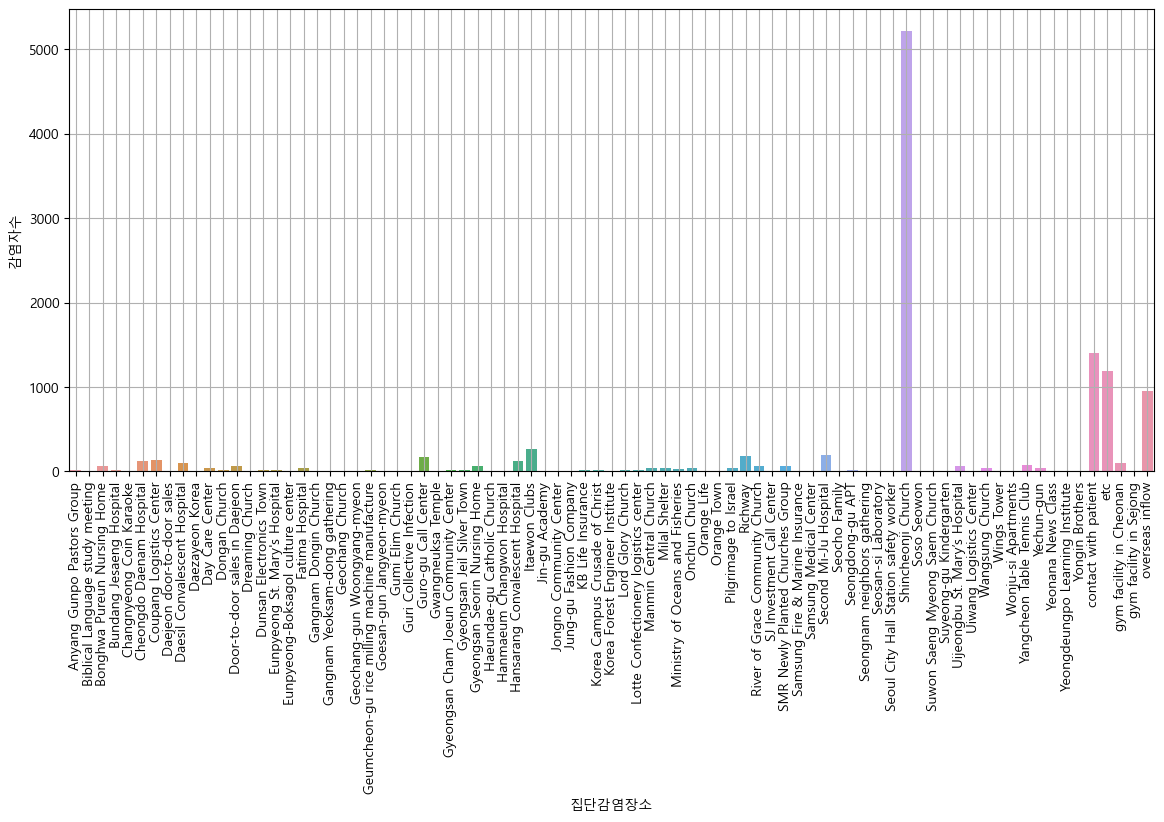

In [35]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.barplot(NOCP, x='집단감염장소', y='감염자수')
plt.grid()

In [37]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


In [39]:
time.columns = ['날짜', '시간', '검사자누적숫자', '음성누적숫자', '양성누적숫자', '완치자누적숫자', '사망자누적숫자']
time.head()

,날짜,시간,검사자누적숫자,음성누적숫자,양성누적숫자,완치자누적숫자,사망자누적숫자
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [40]:
time.isnull().sum()

날짜         0
시간         0
검사자누적숫자    0
음성누적숫자     0
양성누적숫자     0
완치자누적숫자    0
사망자누적숫자    0
dtype: int64

In [44]:
start_date = pd.to_datetime('2020-01-20')
end_date = pd.to_datetime('2020-06-30')

dates = pd.date_range(start_date, end_date, freq='D')
x_values = np.arange(len(dates)) # 눈금 개수

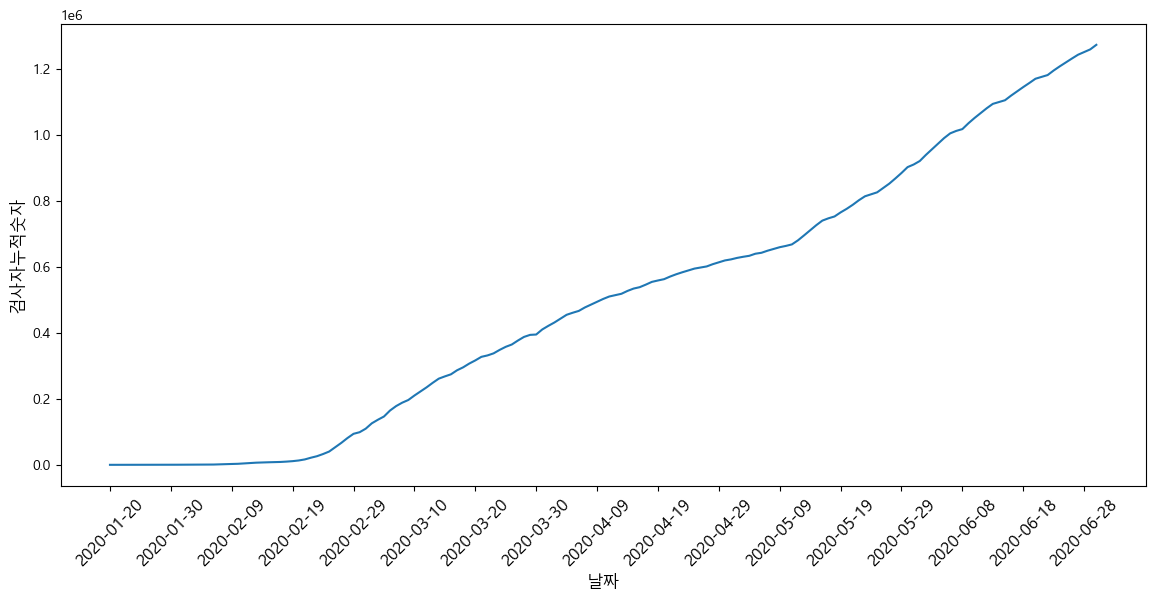

In [47]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(time, x=x_values, y='검사자누적숫자')
ax.set_xticks(x_values[::10]) # 10일 간격으로
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation=45, fontsize=12)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('검사자누적숫자', fontsize=12)
plt.show()


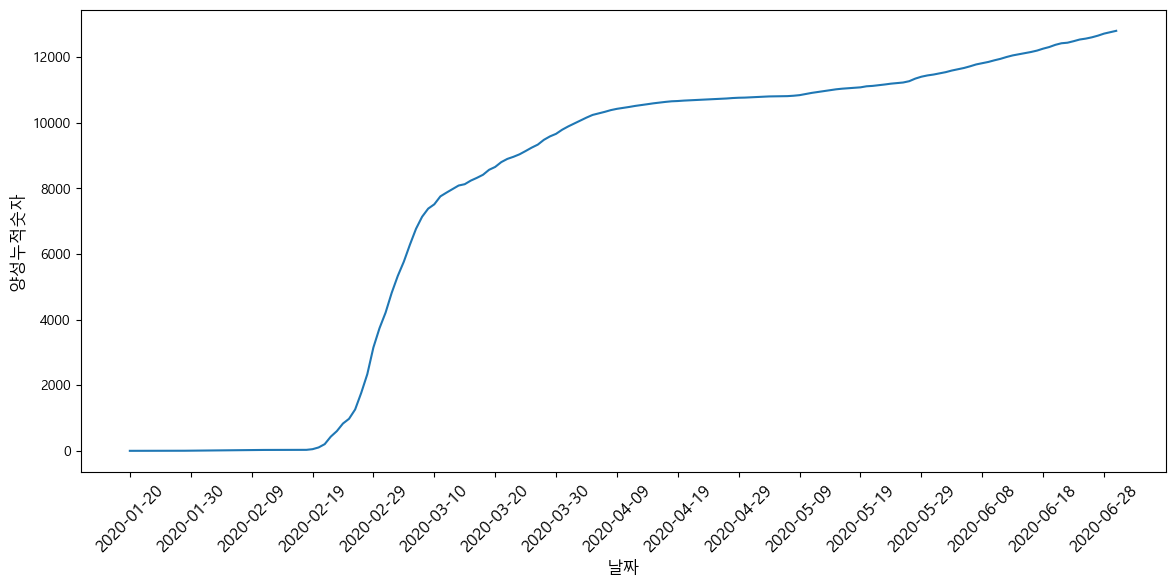

In [48]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(time, x=x_values, y='양성누적숫자')
ax.set_xticks(x_values[::10]) # 10일 간격으로
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation=45, fontsize=12)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('양성누적숫자', fontsize=12)
plt.show()


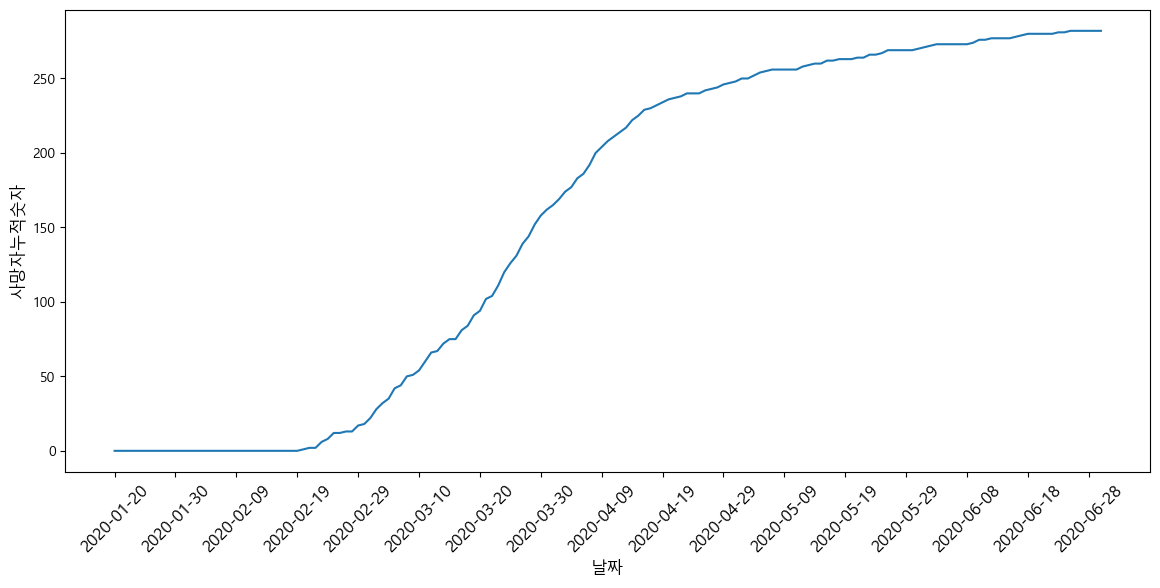

In [49]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(time, x=x_values, y='사망자누적숫자')
ax.set_xticks(x_values[::10]) # 10일 간격으로
ax.set_xticklabels(dates[::10].strftime('%Y-%m-%d'), rotation=45, fontsize=12)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('사망자누적숫자', fontsize=12)
plt.show()


In [67]:
time_age.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [68]:
time_age['time'].value_counts()
time_age.drop('time', axis=1, inplace=True)

In [69]:
time_age.columns = ['날짜', '연령대', '확진자누적수', '사망자누적수']
time_age

,날짜,연령대,확진자누적수,사망자누적수
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1
...,...,...,...,...
1084,2020-06-30,40s,1681,3
1085,2020-06-30,50s,2286,15
1086,2020-06-30,60s,1668,41
1087,2020-06-30,70s,850,82


In [73]:
time_age['날짜'] = pd.to_datetime(time_age['날짜'])
time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1089 non-null   datetime64[ns]
 1   연령대     1089 non-null   object        
 2   확진자누적수  1089 non-null   int64         
 3   사망자누적수  1089 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 34.2+ KB


In [74]:
time_age['연령대'].unique()

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [79]:
time_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      1089 non-null   datetime64[ns]
 1   연령대     1089 non-null   object        
 2   확진자누적수  1089 non-null   int64         
 3   사망자누적수  1089 non-null   int64         
 4   월       1089 non-null   period[M]     
dtypes: datetime64[ns](1), int64(2), object(1), period[M](1)
memory usage: 42.7+ KB


# 날짜를 월별로 묶기

In [83]:
# 날짜를 월별로 묶기
time_age['월'] = time_age['날짜'].dt.to_period('M')

time_age.drop('날짜', axis=1, inplace=True)

monthly_data = time_age.groupby(['월', '연령대'], as_index=False).sum()

monthly_data

,월,연령대,확진자누적수,사망자누적수
0,2020-03,0s,2435,0
1,2020-03,10s,12248,0
2,2020-03,20s,67073,0
3,2020-03,30s,25083,30
4,2020-03,40s,33072,30
5,2020-03,50s,45569,206
6,2020-03,60s,29896,454
7,2020-03,70s,15063,848
8,2020-03,80s,8718,1004
9,2020-04,0s,3969,0


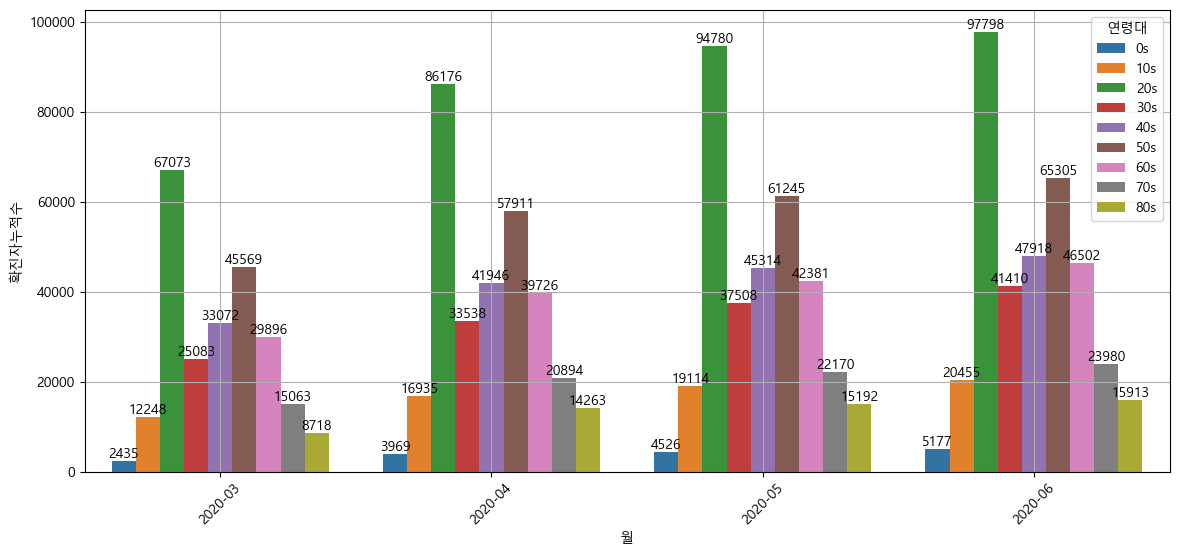

In [87]:
plt.figure(figsize=(14,6))
ax = plt.gca()

plt.xticks(rotation=45)
sns.barplot(monthly_data, x='월', y='확진자누적수', hue='연령대')

for p in ax.patches: # 막대 그래프 위에 숫자를 찍기 위한
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    

plt.grid()
plt.show()

In [88]:
time_province.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [90]:
time_province.columns = ['날짜', '시간', '시도', '확진자누적수', '완치자누적수', '사망자누적수']
time_province.head()

,날짜,시간,시도,확진자누적수,완치자누적수,사망자누적수
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [93]:
time_province['시간'].value_counts()
time_province.drop('시간', axis=1, inplace=True)
time_province

,날짜,시도,확진자누적수,완치자누적수,사망자누적수
0,2020-01-20,Seoul,0,0,0
1,2020-01-20,Busan,0,0,0
2,2020-01-20,Daegu,0,0,0
3,2020-01-20,Incheon,1,0,0
4,2020-01-20,Gwangju,0,0,0
...,...,...,...,...,...
2766,2020-06-30,Jeollabuk-do,27,21,0
2767,2020-06-30,Jeollanam-do,24,19,0
2768,2020-06-30,Gyeongsangbuk-do,1389,1328,54
2769,2020-06-30,Gyeongsangnam-do,134,128,0


In [94]:
time_province.isnull().sum()

날짜        0
시도        0
확진자누적수    0
완치자누적수    0
사망자누적수    0
dtype: int64

([], [])

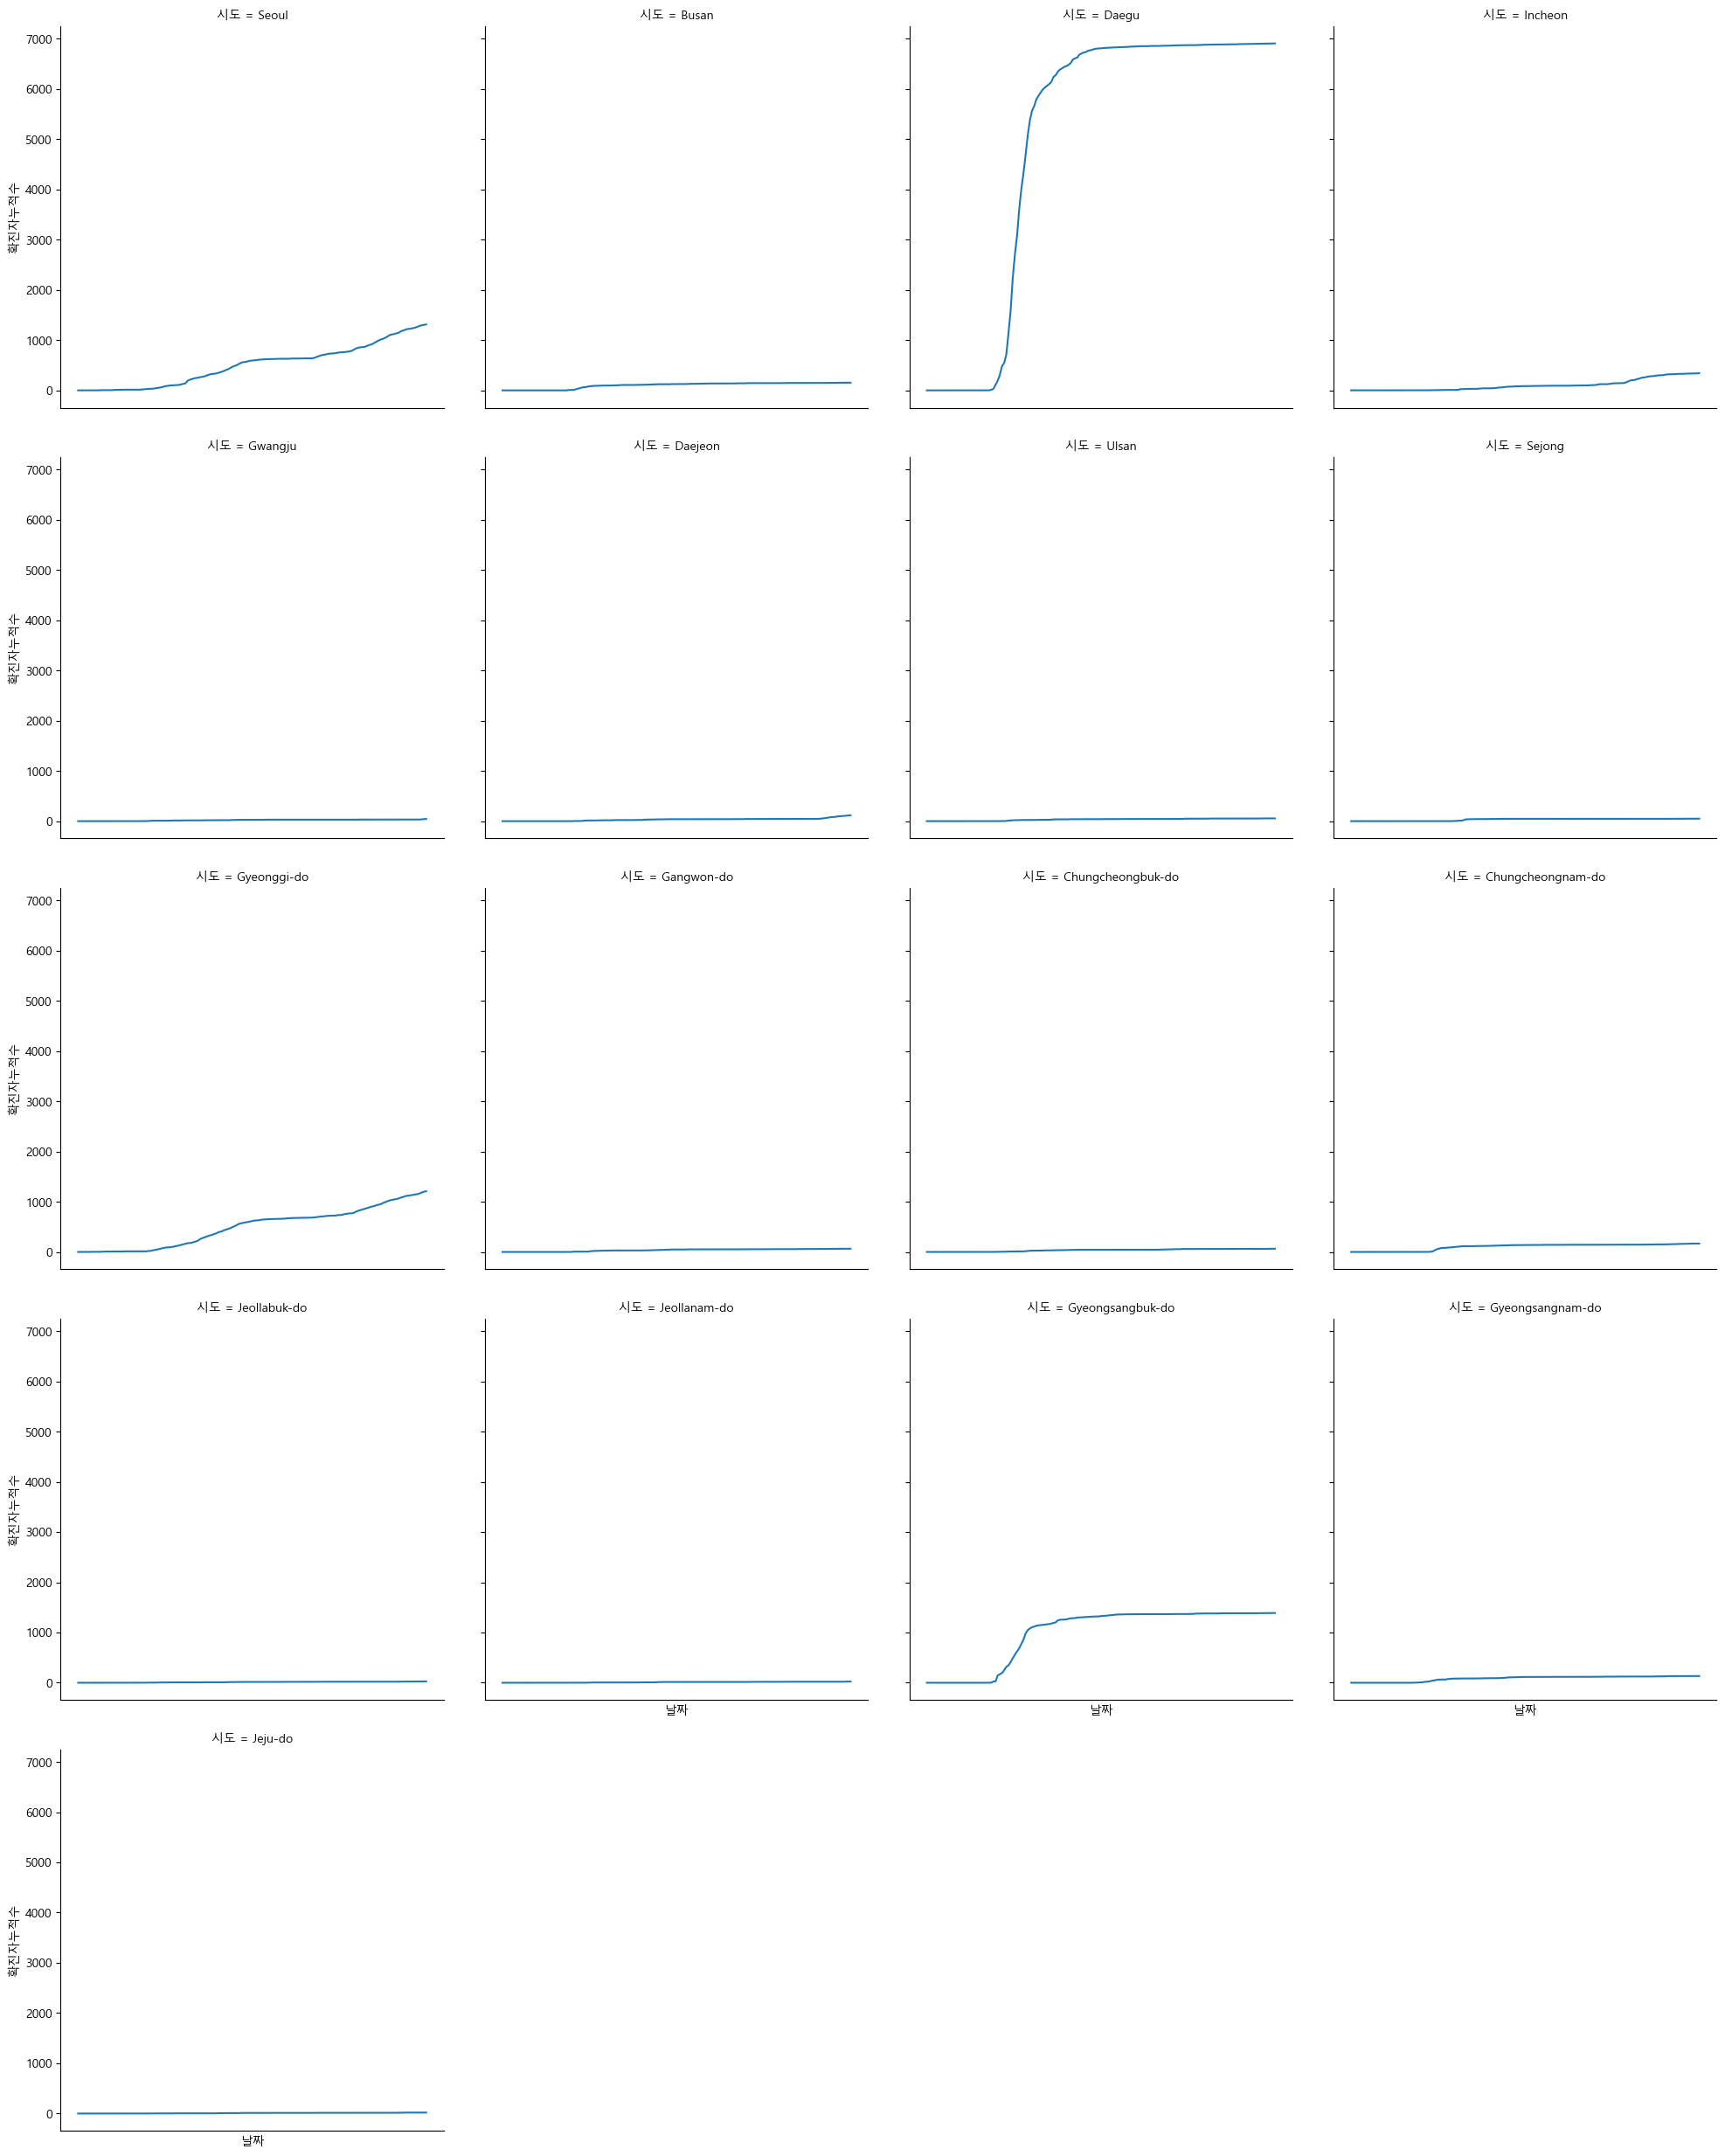

In [96]:
ax = sns.relplot(time_province, x='날짜', y='확진자누적수', kind='line', col='시도', col_wrap=4, sizes=(16,6))
plt.xticks([])

In [97]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [98]:
time_gender.columns = ['날짜', '시간', '성별', '확진자누적수', '사망자누적수']
time_gender.head()

,날짜,시간,성별,확진자누적수,사망자누적수
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [99]:
time_gender.isnull().sum()

날짜        0
시간        0
성별        0
확진자누적수    0
사망자누적수    0
dtype: int64

In [100]:
time_gender['날짜'] = pd.to_datetime(time_gender['날짜'])
time_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      242 non-null    datetime64[ns]
 1   시간      242 non-null    int64         
 2   성별      242 non-null    object        
 3   확진자누적수  242 non-null    int64         
 4   사망자누적수  242 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.6+ KB


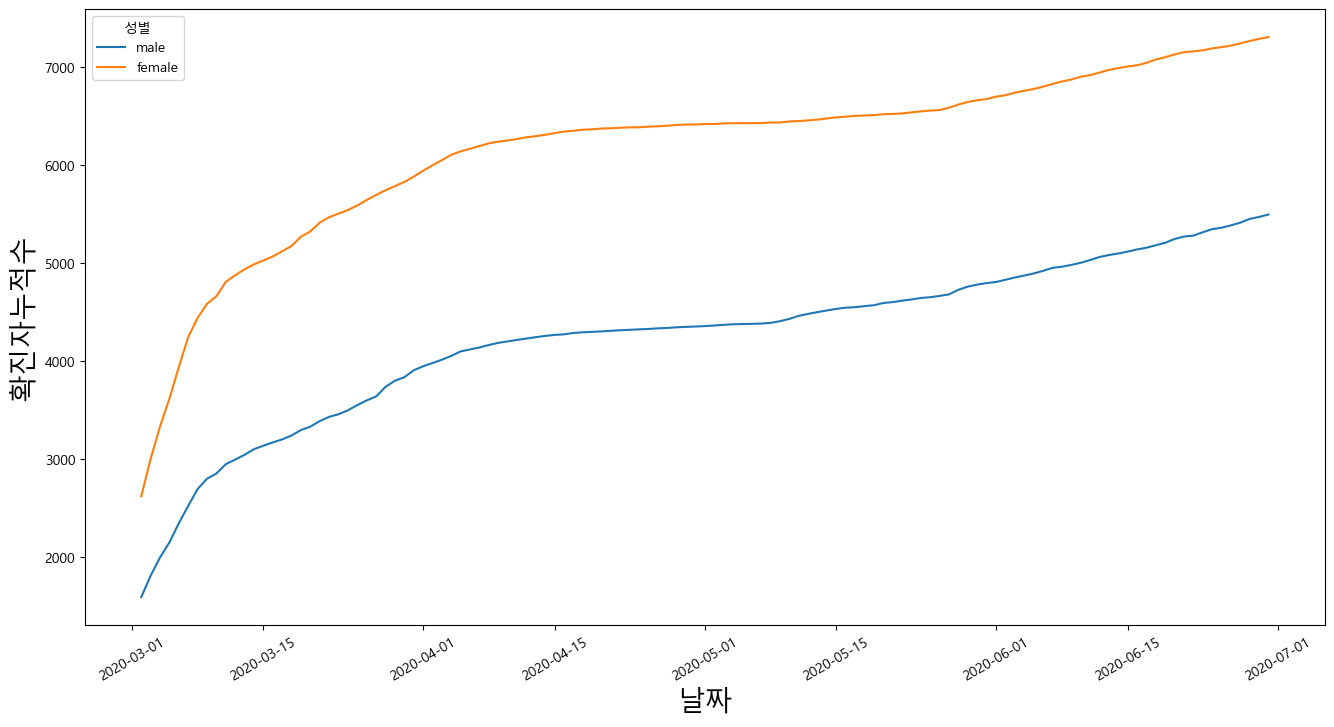

In [101]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=30)
plt.xlabel('날짜', fontsize=20)
plt.ylabel('확진자누적수', fontsize=20)
sns.lineplot(time_gender, x='날짜', y='확진자누적수', hue='성별')
plt.show()